In [20]:
import ROOT as r
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
#Returns the time vs. x and time vs. y data from the pixel_hits. The ATAR is made up of sheets that contain alternating horizontal or vertical strips with npixels_per_plane.
#If npixels_per_plane were 100, for instance, 100036 would represent plate 1, 36 / 100 in x, 100161 would represent plate 2, 61 / 100 in y, etc. The output for each of 
#x and y is an n x 2 matrix, where the first column contains the times corresponding to the coordinate values in the second column.
#Also extract the z (plane #) vs. time data. The third element of the tuples contained in this list and the x and y lists will contain corresponding colors to represent
#when particles have decayed.
def get_event(tree):
    #Print an entry with no pion decay or a pion decay in flight.
    for i, e in enumerate(tree):
        if e.pion_decay == 1 and e.pion_dar == 0:
            print(i)
            tree.GetEntry(i)
            break
    #Store pixel hits for the entry printed above in which a pion didn't decay at rest.
    pixel_times_motion = tree.pixel_time
    pixel_hits_motion = tree.pixel_hits
    pixel_pdg_motion = tree.pixel_pdg
    
    #Create empty data structures for storing x vs. t, y vs. t, and z vs. t data.
    npixels_per_plane = 100
    txc_data = []
    tyc_data = []
    tzc_data = []

    #Extract x vs. t, y vs. t, and z vs. t data. Also add indexed color coding to represent different particles.
    for i in range(pixel_hits_motion.size()):
        plane = int(np.floor((pixel_hits_motion[i] - 1 - 100_000) / npixels_per_plane))

        cur_val = (pixel_hits_motion[i] - 1) % npixels_per_plane
        cur_time = pixel_times_motion[i]
        
        if pixel_pdg_motion[i] == 211:
            cur_color = "r"     # Pion
        elif pixel_pdg_motion[i] == -11:
            cur_color = "b"     # Positron
        else:
            cur_color = "g"     # Electron


        tzc_data.append((cur_time, plane, cur_color))

        if(plane % 2 == 0):
            txc_data.append((cur_time, cur_val, cur_color))
        else:
            tyc_data.append((cur_time, cur_val, cur_color))
    
    return (txc_data, tyc_data, tzc_data)

In [22]:
#Show some useful parameters describing our event.
def display_event(txc_data, tyc_data, tzc_data, tree):
    txc_data, tyc_data, tzc_data = get_event(tree)
    print(len(txc_data))
    print(len(tyc_data))

    print(txc_data)

In [23]:
#Plot x vs. t, y vs. t, and z vs. t data from our event. The graphs will show the color-coding system used to represent different particles.
def plot_event(txc_data, tyc_data, tzc_data):

    plt.figure(figsize = (20, 5))

    plt.subplot(1,3,1)
    plt.scatter([i[0] for i in txc_data], [i[1] for i in txc_data], 10, [i[2] for i in txc_data])
    plt.title("x vs. t")
    plt.xlabel("t (ns)")
    plt.ylabel("x (pix)")
    # plt.xlim(20.157, 20.169)

    plt.subplot(1,3,2)
    plt.scatter([i[0] for i in tyc_data], [i[1] for i in tyc_data], 10, [i[2] for i in tyc_data])
    plt.title("y vs. t")
    plt.xlabel("t (ns)")
    plt.ylabel("y (pix)")
    # plt.xlim(20.157, 20.169)

    plt.subplot(1,3,3)
    plt.scatter([i[0] for i in tzc_data], [i[1] for i in tzc_data], 10, [i[2] for i in tzc_data])
    plt.title("z vs. t")
    plt.xlabel("t (ns)")
    plt.ylabel("z (# of planes)")
    # plt.xlim(20.157, 20.169)

    plt.subplots_adjust(left = 0.1,
                        bottom = 0.1, 
                        right = 0.9, 
                        top = 0.9, 
                        wspace = 0.5, 
                        hspace = 0.4)

In [27]:
#Extract the TTree from the given file location and print out some useful information.
f = r.TFile("pienux_out_stripped.root")
f.ls()
t = f.Get("atar")
print([x.GetName() for x in t.GetListOfBranches()])
print("\n")

['pixel_hits', 'pixel_pdg', 'pixel_edep', 'pixel_time', 'nhit', 'has_pion', 'pion_decay', 'pion_dar', 'has_muon', 'muon_decay', 'muon_dar', 'has_positron', 'pion_total_edep', 'muon_total_edep', 'pos_total_edep', 'has_excited_nucleus']


TFile**		pienux_out_stripped.root	
 TFile*		pienux_out_stripped.root	
  KEY: TTree	atar;6	Energy deposited in the ATAR [current cycle]
  KEY: TTree	atar;5	Energy deposited in the ATAR [backup cycle]
  KEY: TTree	atar;4	Energy deposited in the ATAR [backup cycle]
  KEY: TTree	calorimeter;2	Energy deposited in the calorimeter [current cycle]
  KEY: TTree	calorimeter;1	Energy deposited in the calorimeter [backup cycle]
  KEY: TTree	degrader;2	Degrader [current cycle]
  KEY: TTree	degrader;1	Degrader [backup cycle]
  KEY: TTree	init;2	Initial conditions of the simulation [current cycle]
  KEY: TTree	init;1	Initial conditions of the simulation [backup cycle]


66
66
4
3
[(2.263816630034867, 53, 'r'), (2.266164215610736, 53, 'r'), (2.268581282363194, 53, 'r'), (2.270672736151092, 53, 'r')]


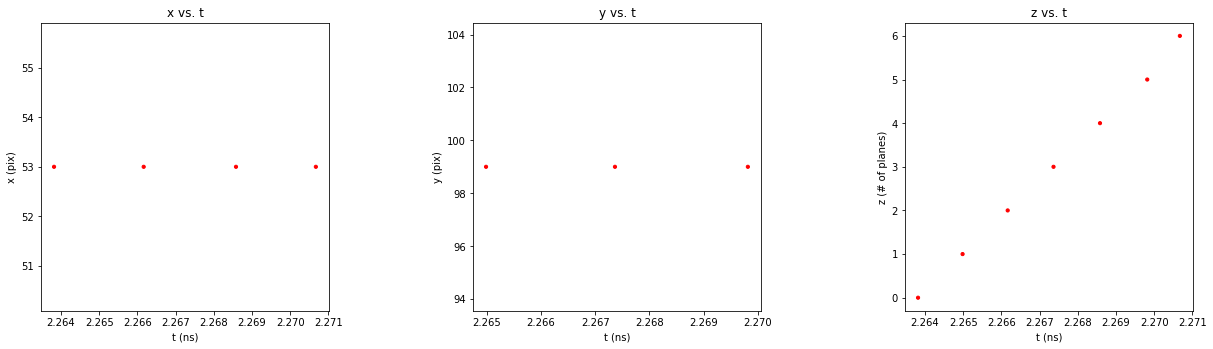

In [28]:
xt, yt, zt = get_event(t)
display_event(xt, yt, zt, t)
plot_event(xt, yt, zt)